In [1]:
from math import sin, cos, acos, radians
import random
import collections
from sklearn.model_selection import train_test_split
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split, GridSearchCV
import math
from sklearn.cluster import KMeans
from IPython.display import Image
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.9'

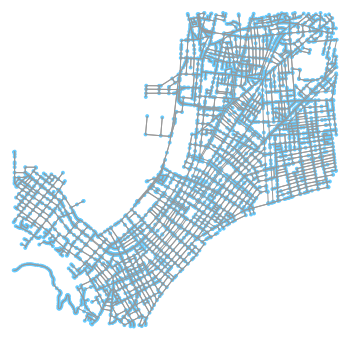

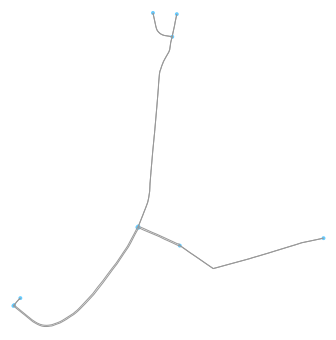

In [2]:
#幹線道路の読み込み
stations = pd.read_csv('station_latlon.csv')
for i in range(0, 1):
    station = [stations.iloc[i,5], stations.iloc[i,6]]
    G = ox.graph_from_point(station, distance=2000, network_type='drive', simplify=False)
    fig, ax = ox.plot_graph(ox.project_graph(G))
    hwy_types = ['motorway','trunk','trunk_link', 'motorway_link']
    gdf = ox.graph_to_gdfs(G, nodes=False)
    mask = ~gdf['highway'].map(lambda x: isinstance(x, str) and x in hwy_types)
    edges = zip(gdf[mask]['u'], gdf[mask]['v'], gdf[mask]['key'])
    G.remove_edges_from(edges)
    G = ox.remove_isolated_nodes(G)
    G = ox.simplify_graph(G)
    fig, ax = ox.plot_graph(ox.project_graph(G))
    G_proj = ox.project_graph(G)
    nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
    stats = ox.basic_stats(G_proj, clean_intersects=True, circuity_dist='euclidean')
    extends_stats = ox.extended_stats(G, ecc=True, bc=True,cc=True)

In [3]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)

In [4]:
#道路網の基本情報
G_proj = ox.project_graph(G)
stats = ox.basic_stats(G_proj, clean_intersects=True, circuity_dist='euclidean')

In [5]:
#道路の詳細情報
extends_stats = ox.extended_stats(G, ecc=True, bc=True,cc=True)

In [6]:
G.degree[2509425191]

4

In [7]:
nodes_index = list(nodes_proj.index)

In [8]:
#ノード（行きと帰りがあるので、一つの道路で２）の次数が２以下の道路同士にエッジを追加する
min_nodes_index = []
for i in range(len(nodes_index)):
    if G.degree[nodes_index[i]] < 3:
        min_nodes_index.append(nodes_index[i])
while len(min_nodes_index) >= 2:
    random.shuffle(min_nodes_index)
    G.add_edge(min_nodes_index[0], min_nodes_index[1])
    min_nodes_index.pop(0)
    min_nodes_index.pop(0)

In [9]:
min_nodes_index

[]

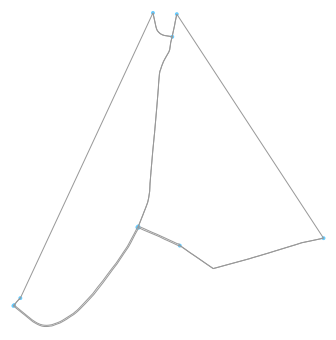

In [10]:
fig, ax = ox.plot_graph(ox.project_graph(G))

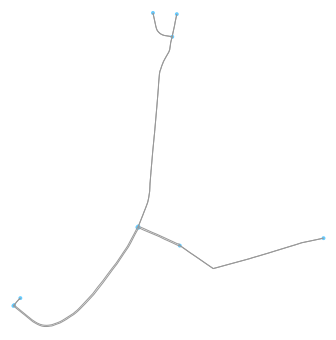

In [12]:
#幹線道路の読み込み(trunkまで)
stations = pd.read_csv('station_latlon.csv')
for i in range(0, 1):
    station = [stations.iloc[i,5], stations.iloc[i,6]]
    G = ox.graph_from_point(station, distance=2000, network_type='drive', simplify=False)
    #fig, ax = ox.plot_graph(ox.project_graph(G))
    hwy_types = ['motorway','trunk','trunk_link', 'motorway_link']
    gdf = ox.graph_to_gdfs(G, nodes=False)
    mask = ~gdf['highway'].map(lambda x: isinstance(x, str) and x in hwy_types)
    edges = zip(gdf[mask]['u'], gdf[mask]['v'], gdf[mask]['key'])
    G.remove_edges_from(edges)
    G = ox.remove_isolated_nodes(G)
    G = ox.simplify_graph(G)
    fig, ax = ox.plot_graph(ox.project_graph(G))
    G_proj = ox.project_graph(G)
    nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
    stats = ox.basic_stats(G_proj, clean_intersects=True, circuity_dist='euclidean')
    extends_stats = ox.extended_stats(G, ecc=True, bc=True,cc=True)

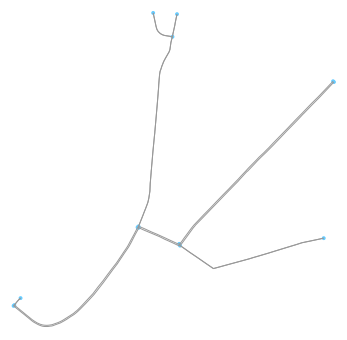

In [13]:
#幹線道路の読み込み(primaryまで)
stations = pd.read_csv('station_latlon.csv')
for i in range(0, 1):
    station = [stations.iloc[i,5], stations.iloc[i,6]]
    G_pri = ox.graph_from_point(station, distance=2000, network_type='drive', simplify=False)
    #fig, ax = ox.plot_graph(ox.project_graph(G))
    hwy_types = ['motorway','trunk','trunk_link', 'motorway_link', 'primary', 'primary_link']
    gdf_pri = ox.graph_to_gdfs(G_pri, nodes=False)
    mask = ~gdf_pri['highway'].map(lambda x: isinstance(x, str) and x in hwy_types)
    edges = zip(gdf_pri[mask]['u'], gdf_pri[mask]['v'], gdf_pri[mask]['key'])
    G_pri.remove_edges_from(edges)
    G_pri = ox.remove_isolated_nodes(G_pri)
    G_pri = ox.simplify_graph(G_pri)
    fig, ax = ox.plot_graph(ox.project_graph(G_pri))
    G_pri_proj = ox.project_graph(G_pri)
    nodes_pri_proj = ox.graph_to_gdfs(G_pri_proj, edges=False)
    pri_stats = ox.basic_stats(G_pri_proj, clean_intersects=True, circuity_dist='euclidean')
    pri_extends_stats = ox.extended_stats(G_pri, ecc=True, bc=True,cc=True)

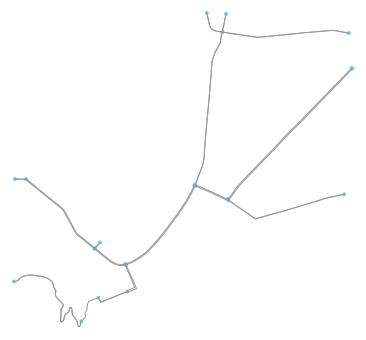

In [14]:
#幹線道路の読み込み(secondaryまで)
stations = pd.read_csv('station_latlon.csv')
for i in range(0, 1):
    station = [stations.iloc[i,5], stations.iloc[i,6]]
    G_sec = ox.graph_from_point(station, distance=2000, network_type='drive', simplify=False)
    #fig, ax = ox.plot_graph(ox.project_graph(G))
    hwy_types = ['motorway','trunk','trunk_link', 'motorway_link', 'primary', 'primary_link', 'secondary', 'secondary_link']
    gdf_sec = ox.graph_to_gdfs(G_sec, nodes=False)
    mask = ~gdf_sec['highway'].map(lambda x: isinstance(x, str) and x in hwy_types)
    edges = zip(gdf_sec[mask]['u'], gdf_sec[mask]['v'], gdf_sec[mask]['key'])
    G_sec.remove_edges_from(edges)
    G_sec = ox.remove_isolated_nodes(G_sec)
    G_sec = ox.simplify_graph(G_sec)
    fig, ax = ox.plot_graph(ox.project_graph(G_sec))
    G_sec_proj = ox.project_graph(G_sec)
    nodes_sec_proj = ox.graph_to_gdfs(G_sec_proj, edges=False)
    sec_stats = ox.basic_stats(G_sec_proj, clean_intersects=True, circuity_dist='euclidean')
    sec_extends_stats = ox.extended_stats(G_sec, ecc=True, bc=True,cc=True)

In [113]:
stats

{'n': 11,
 'm': 19,
 'k_avg': 3.4545454545454546,
 'intersection_count': 7,
 'streets_per_node_avg': 2.3636363636363638,
 'streets_per_node_counts': {0: 0, 1: 4, 2: 1, 3: 4, 4: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.36363636363636365,
  2: 0.09090909090909091,
  3: 0.36363636363636365,
  4: 0.18181818181818182},
 'edge_length_total': 12435.501999999999,
 'edge_length_avg': 654.5001052631578,
 'street_length_total': 8388.463000000002,
 'street_length_avg': 645.2663846153847,
 'street_segments_count': 13,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0839364920193633,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 4,
 'clean_intersection_density_km': None}

In [114]:
pri_stats

{'n': 14,
 'm': 22,
 'k_avg': 3.142857142857143,
 'intersection_count': 8,
 'streets_per_node_avg': 2.2857142857142856,
 'streets_per_node_counts': {0: 0, 1: 6, 2: 1, 3: 4, 4: 3},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.42857142857142855,
  2: 0.07142857142857142,
  3: 0.2857142857142857,
  4: 0.21428571428571427},
 'edge_length_total': 16772.204999999998,
 'edge_length_avg': 762.3729545454545,
 'street_length_total': 12725.166000000001,
 'street_length_avg': 795.3228750000001,
 'street_segments_count': 16,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0608855072713979,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 4,
 'clean_intersection_density_km': None}

In [115]:
sec_stats

{'n': 24,
 'm': 40,
 'k_avg': 3.3333333333333335,
 'intersection_count': 15,
 'streets_per_node_avg': 2.5,
 'streets_per_node_counts': {0: 0, 1: 9, 2: 2, 3: 5, 4: 8},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.375,
  2: 0.08333333333333333,
  3: 0.20833333333333334,
  4: 0.3333333333333333},
 'edge_length_total': 27650.911,
 'edge_length_avg': 691.272775,
 'street_length_total': 19978.455,
 'street_length_avg': 665.9485000000001,
 'street_segments_count': 30,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0833778830166467,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 9,
 'clean_intersection_density_km': None}

In [53]:
nodes_sec_proj['lat'].max()

41.7915516

In [15]:
#道路網があるエリアにノードを追加する
max_lat = nodes_proj['lat'].max()
min_lat = nodes_proj['lat'].min()
max_lon = nodes_proj['lon'].max()
min_lon = nodes_proj['lon'].min()
diff_sec = nx.number_of_nodes(G_sec) - nx.number_of_nodes(G)
print(diff_sec)
for i in range(diff_sec):
    node_point_x = random.uniform(min_lon,max_lon)
    node_point_y = random.uniform(min_lat,max_lat)
    G.add_node(i)
    G.nodes[i]['x'] = node_point_x
    G.nodes[i]['y'] = node_point_y

13


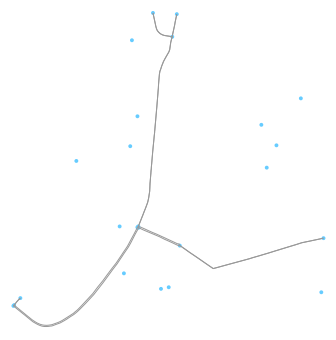

In [16]:
fig, ax = ox.plot_graph(ox.project_graph(G))

In [81]:
#辺を加える際のルール
#ノード同士の近さでクラスタリング
#クラスタ数はとりあえず考える
#各クラスタ内で、現存するノードとの最短距離を計算し、一番距離が短いノードと現存するノードをつなぐ
#各クラスタ内でノード同士をつなぐ、その際に、クラスタ内のノードと繋がっている現存のノードのほうが距離が短い場合、そのノードと結合する

In [17]:
#座標でクラスタリング
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)

In [18]:
nodes_proj

,highway,lat,lon,osmid,x,y,geometry
2509425191,traffic_signals,41.772633,140.728131,2.509425e+09,477404.465203,4.624568e+06,POINT (477404.4652031656 4624568.1747216)
5535566398,crossing,41.771760,140.749332,5.535566e+09,479166.229275,4.624466e+06,POINT (479166.2292749028 4624465.864259386)
4139896403,traffic_signals,41.765712,140.713821,4.139896e+09,476212.585729,4.623804e+06,POINT (476212.5857293808 4623803.643456749)
262656607,traffic_signals,41.789458,140.731926,2.626566e+08,477725.739507,4.626435e+06,POINT (477725.7395072667 4626435.120350852)
262656666,NaN,41.791552,140.729703,2.626567e+08,477541.769215,4.626668e+06,POINT (477541.7692149241 4626668.162623031)
262656753,traffic_signals,41.772749,140.728101,2.626568e+08,477401.995834,4.624581e+06,POINT (477401.9958339554 4624581.028200931)
262659311,NaN,41.791450,140.732437,2.626593e+08,477768.878641,4.626656e+06,POINT (477768.8786408749 4626656.18307949)
292281667,traffic_signals,41.766402,140.714616,2.922817e+08,476278.879137,4.623880e+06,POINT (476278.8791365065 4623879.953219729)
292281669,traffic_signals,41.765784,140.713902,2.922817e+08,476219.361692,4.623812e+06,POINT (476219.3616916185 4623811.603664101)
1654777378,traffic_signals,41.771065,140.732865,1.654777e+09,477797.376238,4.624393e+06,POINT (477797.3762380619 4624392.877519787)


In [19]:
added_nodes = nodes_proj.iloc[11:,:]

In [20]:
added_nodes = added_nodes[['lat', 'lon']]

In [21]:
#特徴量の正規化（min-maxを利用）
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
added_nodes_norm = mms.fit_transform(added_nodes)

In [22]:
added_nodes_norm

array([[0.58387281, 0.81536991],
       [0.49497203, 0.77601302],
       [0.0117708 , 0.34663005],
       [1.        , 0.22491558],
       [0.01815001, 0.37815231],
       [0.5193588 , 0.        ],
       [0.        , 1.        ],
       [0.0729363 , 0.19534782],
       [0.25949299, 0.17735915],
       [0.69772501, 0.24843851],
       [0.57865729, 0.21951636],
       [0.66528847, 0.75358201],
       [0.7709249 , 0.91423363]])

In [23]:
pred = KMeans(n_clusters=4).fit_predict(added_nodes_norm)

In [24]:
print(pred)

[0 0 1 2 1 2 3 1 1 2 2 0 0]


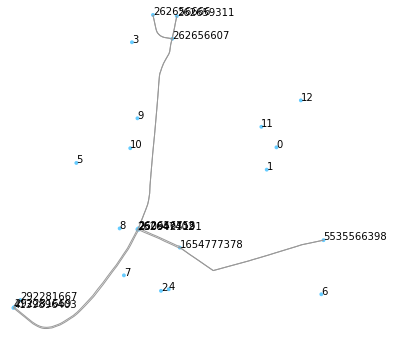

In [25]:
fig, ax = ox.plot_graph(ox.project_graph(G),annotate=True)

In [26]:
added_nodes['cluster_id'] = pred

In [27]:
added_nodes

,lat,lon,cluster_id
0,41.779924,140.743906,0
1,41.777956,140.742800,0
2,41.767256,140.730725,1
3,41.789138,140.727302,2
4,41.767398,140.731612,1
5,41.778495,140.720978,2
6,41.766996,140.749098,3
7,41.768611,140.726471,1
8,41.772741,140.725965,1
9,41.782445,140.727964,2


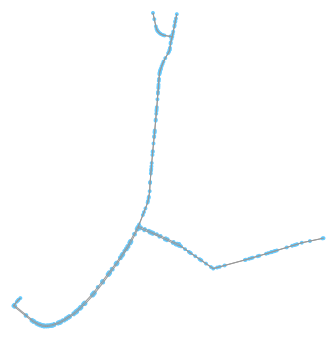

In [96]:
#現存するノードとの最短距離を計算する
#幹線道路の読み込み(not simplified)
stations = pd.read_csv('station_latlon.csv')
for i in range(0, 1):
    station = [stations.iloc[i,5], stations.iloc[i,6]]
    G_not = ox.graph_from_point(station, distance=2000, network_type='drive', simplify=False)
    #fig, ax = ox.plot_graph(ox.project_graph(G))
    hwy_types = ['motorway','trunk','trunk_link', 'motorway_link']
    gdf_not = ox.graph_to_gdfs(G_not, nodes=False)
    mask = ~gdf['highway'].map(lambda x: isinstance(x, str) and x in hwy_types)
    edges = zip(gdf_not[mask]['u'], gdf_not[mask]['v'], gdf_not[mask]['key'])
    G_not.remove_edges_from(edges)
    G_not = ox.remove_isolated_nodes(G_not)
    #G = ox.simplify_graph(G)
    fig, ax = ox.plot_graph(ox.project_graph(G_not))
    G_not_proj = ox.project_graph(G_not)
    nodes_not_proj = ox.graph_to_gdfs(G_not_proj, edges=False)
    not_stats = ox.basic_stats(G_not_proj, clean_intersects=True, circuity_dist='euclidean')
    not_extends_stats = ox.extended_stats(G_not, ecc=True, bc=True,cc=True)

In [97]:
nodes_not_proj.index

Int64Index([4747919453, 4747919454, 4747919455, 4747919456, 4747919457,
            4747919458, 4747919459, 4747919460, 4747919461, 4747919462,
            ...
            6086524703,  672694049, 5585846061, 5592586575, 5592586585,
            5592586587, 5592586588, 5585846248, 5585846251, 5585846252],
           dtype='int64', length=270)

In [98]:
earth_rad = 6378.137
def latlng_to_xyz(lat, lng):
    rlat, rlng = radians(lat), radians(lng)
    coslat = cos(rlat)
    return coslat*cos(rlng), coslat*sin(rlng), sin(rlat)

def dist_on_sphere(lat1,lon1,lat2,lon2, radius=earth_rad):
    xyz0, xyz1 = latlng_to_xyz(lat1, lon1), latlng_to_xyz(lat2,lon2)
    return acos(sum(x * y for x, y in zip(xyz0, xyz1)))*radius*1000
#nodelength = dist_on_sphere(nodes_proj.iloc[-3,1],nodes_proj.iloc[-3,2],nodes_proj.iloc[-1,1],nodes_proj.iloc[-1,2], radius=earth_rad)
#nodelength2 = dist_on_sphere(nodes_proj.iloc[-2,1],nodes_proj.iloc[-2,2],nodes_proj.iloc[-1,1],nodes_proj.iloc[-1,2], radius=earth_rad)


In [99]:
#各ノードと現存ノードとの最小値を計算する
added_nodes['min_nodes'] = 0
added_nodes['min_dis'] = 10000000000
for i in range(len(added_nodes)):
    for j in range(len(nodes_not_proj)):
        nodelength = dist_on_sphere(added_nodes.iloc[i,0],added_nodes.iloc[i,1],nodes_not_proj.iloc[j,1],nodes_not_proj.iloc[j,2], radius=earth_rad)
        if added_nodes.iloc[i,-1] > nodelength:
            added_nodes.iloc[i,-1] = nodelength
            added_nodes.iloc[i,-2] = list(nodes_not_proj.index)[j]

In [100]:
added_nodes

,lat,lon,cluster_id,min_nodes,min_dis
0,41.779924,140.743906,0,262997328,984.843382
1,41.777956,140.742800,0,5535564358,803.090585
2,41.767256,140.730725,1,5570618881,449.159687
3,41.789138,140.727302,2,1681849750,259.458267
4,41.767398,140.731612,1,5570620430,394.510243
5,41.778495,140.720978,2,5596600971,716.328337
6,41.766996,140.749098,3,1633046622,513.544146
7,41.768611,140.726471,1,5592586548,111.288940
8,41.772741,140.725965,1,757025461,155.663132
9,41.782445,140.727964,2,262659323,176.800789


In [101]:
#クラスタ内で現存するノードと一番近いノードをそれとつなげる
for i in range(added_nodes.shape[0]):
    G_not.add_node(i)
    G_not.nodes[i]['x'] = added_nodes.iloc[i,1]
    G_not.nodes[i]['y'] = added_nodes.iloc[i,0]
for i in range(4):
    cluster_nodes = added_nodes[added_nodes['cluster_id'] == i]
    #print(cluster_nodes['min_dis'].min())
    cluster_nodes = cluster_nodes.sort_values('min_dis')
    print(cluster_nodes.iloc[0,3])
    print(list(cluster_nodes.index)[0])
    #エッジを追加
    G_not.add_edge(list(cluster_nodes.index)[0],cluster_nodes.iloc[0,3])
    G_not.add_edge(cluster_nodes.iloc[0,3],list(cluster_nodes.index)[0])
    print(G_not.nodes[cluster_nodes.iloc[0,3]]['x'])
    nodelength = dist_on_sphere(cluster_nodes.iloc[0,0],cluster_nodes.iloc[0,1],G_not.nodes[cluster_nodes.iloc[0,3]]['y'],G_not.nodes[cluster_nodes.iloc[0,3]]['x'], radius=earth_rad)
    G_not.edges[list(cluster_nodes.index)[0],cluster_nodes.iloc[0,3],0]['length'] = nodelength
    G_not.edges[cluster_nodes.iloc[0,3],list(cluster_nodes.index)[0],0]['length'] = nodelength

5535564358
1
140.7457396
5592586548
7
140.7256297
262659323
9
140.7300598
1633046622
6
140.7477693


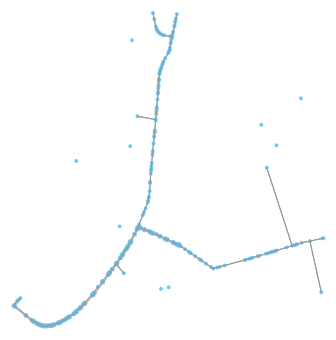

In [102]:
fig, ax = ox.plot_graph(ox.project_graph(G_not))

In [149]:
#それぞれのクラスタ内のノードを結合する
#ルールを決める必要がある
#そのために道路の特徴を知る必要がある
#道路の生成方法は再考の余地あり

In [103]:
G_not_s = ox.simplify_graph(G_not)

In [104]:
G_not_proj_s = ox.project_graph(G_not_s)
nodes_not_proj_s = ox.graph_to_gdfs(G_not_proj_s, edges=False)
not_stats_s = ox.basic_stats(G_not_proj_s, clean_intersects=True, circuity_dist='euclidean')
not_extends_stats_s = ox.extended_stats(G_not_s, ecc=True, bc=True,cc=True)

In [105]:
not_stats_s

{'n': 28,
 'm': 34,
 'k_avg': 2.4285714285714284,
 'intersection_count': 11,
 'streets_per_node_avg': 1.5,
 'streets_per_node_counts': {0: 9, 1: 8, 2: 1, 3: 8, 4: 2},
 'streets_per_node_proportion': {0: 0.32142857142857145,
  1: 0.2857142857142857,
  2: 0.03571428571428571,
  3: 0.2857142857142857,
  4: 0.07142857142857142},
 'edge_length_total': 15644.950920253359,
 'edge_length_avg': 460.14561530156936,
 'street_length_total': 9993.187460126677,
 'street_length_avg': 475.86606952984175,
 'street_segments_count': 21,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0603998032262179,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 8,
 'clean_intersection_density_km': None}

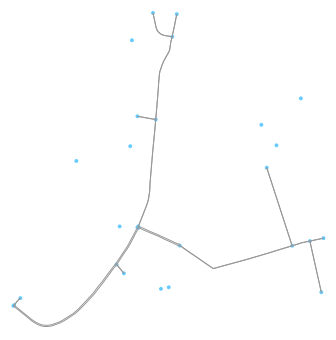

In [48]:
fig, ax = ox.plot_graph(ox.project_graph(G_not_s))

In [75]:
nx.number_of_edges(G_not_s)

40

In [ ]:
#段階ごとの道路の特徴
#道路を種類ごとにまとめて、ある種類ごとの道路にまとめる
#その特徴にしたがって道路を作成


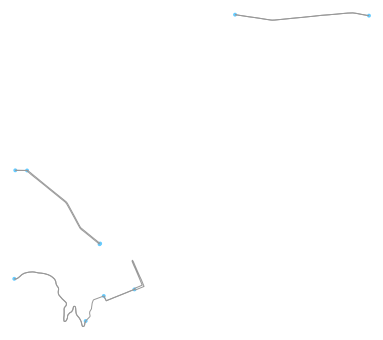

In [106]:
#幹線道路の読み込み(secondaryまで)
stations = pd.read_csv('station_latlon.csv')
for i in range(0, 1):
    station = [stations.iloc[i,5], stations.iloc[i,6]]
    G_sec = ox.graph_from_point(station, distance=2000, network_type='drive', simplify=False)
    #fig, ax = ox.plot_graph(ox.project_graph(G))
    hwy_types = ['secondary', 'secondary_link']
    gdf_sec = ox.graph_to_gdfs(G_sec, nodes=False)
    mask = ~gdf_sec['highway'].map(lambda x: isinstance(x, str) and x in hwy_types)
    edges = zip(gdf_sec[mask]['u'], gdf_sec[mask]['v'], gdf_sec[mask]['key'])
    G_sec.remove_edges_from(edges)
    G_sec = ox.remove_isolated_nodes(G_sec)
    G_sec = ox.simplify_graph(G_sec)
    fig, ax = ox.plot_graph(ox.project_graph(G_sec))
    G_sec_proj = ox.project_graph(G_sec)
    nodes_sec_proj = ox.graph_to_gdfs(G_sec_proj, edges=False)
    sec_stats = ox.basic_stats(G_sec_proj, clean_intersects=True, circuity_dist='euclidean')
    sec_extends_stats = ox.extended_stats(G_sec, ecc=True, bc=True,cc=True)